# Dá para cortar?

Antes mesmo da epidemia chegar ao município de Feira de Santana,
a Câmara de Vereadores já era conhecida por seus gastos extravagantes.
A casa já chegou a gastar, de uma só vez, [17.767,60 em iogurtes][1]
e disponibilizar 60 linhas de telefone celular para uso dos vereadores ,
apesar dos gastos [R$ 40 mil anuais com a Telemar][1].

[1]: https://www.blogdovelame.com/camara-de-feira-ja-chegou-a-comprar-616-unidades-de-iogurte-de-uma-so-vez/
[2]: https://www.blogdovelame.com/camara-de-feira-disponibiliza-60-linhas-de-telefone-celular-para-uso-dos-vereadores/


Muitas Câmaras tem se mobilizado para cortar gastos e repassar a verba
para que a prefeitura utilize nos esforços para conter a pandemia.

Nesse texto vamos conhecer um pouco melhor as despesas da Câmara e
o que pode ser cortado para ajudar o município na crise do COVID-19.

## As despesas da Câmara Municipal

Antes, vamos entender um pouco sobre as despesas, segundo a própria Câmara:

> São todos os gastos feitos pela Câmara. As Despesas são divididas em:

> - Despesas correntes. Aquelas necessárias à manutenção dos serviços públicos, como as despesas com material de consumo, telefone, pessoal, serviços de terceiros, etc.
> - Despesas de capital. São os investimentos, ou seja, gastos com novos equipamentos e obras, como construção e reforma de escolas, hospitais, postos de saúde, pavimentação, etc.
Os registros de classificação da despesa são efetuados por meio de rotinas específicas e de forma geral podem ser assim tratadas:

> - Valor Orçado (Dotação Orçamentária) - Dependem de autorização legislativa e correspondem ao valor a ser utilizado para a manutenção da Administração Pública;
> - Valor Empenhado - Consiste na reserva da dotação orçamentária para um fim específico, devendo registrar o nome/razão social do credor, valor e descrição do que será pago;
> - Valor Liquidado - Registra efetivamente a despesa executada. No entanto, por ocasião do encerramento do exercício, conforme as normas da Lei Federal n° 4.320/1964, as despesas empenhadas e ainda não liquidadas são inscritas em restos a pagar não processados;
> - Valor Pago - Consiste na entrega do numerário ao credor e só pode ser efetuado após regular liquidação da despesa.

Fonte: https://www.transparencia.feiradesantana.ba.leg.br/index.php?view=despesasinfo

No [portal da transparência](https://www.transparencia.feiradesantana.ba.leg.br/index.php?view=despesasinfo)
podemos verificar os gastos nas três fases: empenho, liquidação e pagamento. Cada despesa
apresenta também as seguintes informações:

![](images/despesa.png)

* Data
* Fase
* Credor (Empresa ou pessoa física)
* Valor
* Número
* Documento (o CPF ou CNPJ da empresa ou pessoa)
* Número do processo
* Bem / Serviço prestado
* Natureza
* Função
* Subfunção
* Processo licitatório
* Fonte de recurso

Mas como saber qual valor pode ser gasto pelo município durante o ano?

## Lei Orçamentária

O valor que o município pode gastar, bem como a receita esperada, é estabelecido
pela Lei Orçamentária Anual (LOA). Todos os anos o município deve estabelecer um orçamento
para o ano seguinte. Saiba mais sobre isso [aqui](https://www.politize.com.br/ppa-ldo-loa-3-siglas-que-definem-orcamento-governo/).

Embora esteja publicada no diário oficial, a LOA de Feira de Santana não foi encontrada
facilmente nos portais da transparência da prefeitura e da câmara. Você pode acessá-la
[aqui](http://www.diariooficial.feiradesantana.ba.gov.br/atos/executivo/1JE1WJ2162019.pdf).


In [105]:
from bokeh.plotting import figure, show
import bokeh.io
from bokeh.models import BasicTickFormatter, ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.palettes import Spectral3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bokeh.io.reset_output()
bokeh.io.output_notebook()

Loading BokehJS ...

In [106]:
despesas = pd.read_csv('despesas-camara.csv')
despesas.head()

,company_or_person,crawled_at,crawled_from,date,document,function,group,legal_status,number,phase,process_number,published_at,resource,subfunction,subgroup,summary,type_of_process,value
0,EDITORA PRINCESA LTDA,2020-04-11 10:12:39.549868,https://www.transparencia.feiradesantana.ba.le...,2010-01-04,00.725.755/0001-62,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039680000 - Serv.de Publicidade e propagand...,062/2010,empenho,029/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Serv.de Publicidade e propaganda,IMPORTE DESTINADO PUBLICACAO DE ATOS OFICIAIS ...,DISPENSA,130.00
1,CEDRO EDITORA GRAFICA LTDA,2020-04-11 10:12:39.553791,https://www.transparencia.feiradesantana.ba.le...,2010-01-04,00.597.920/0001-30,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039680000 - Serv.de Publicidade e propagand...,063/2010,empenho,030/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Serv.de Publicidade e propaganda,IMPORTE DESTINADO A PUBLICACAO DE ATOS OFICIAI...,DISPENSA,360.00
2,ELEVADORES OTIS LTDA,2020-04-11 10:12:39.561768,https://www.transparencia.feiradesantana.ba.le...,2010-01-04,02.973.973/0010-01,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039150000 - Manut.e Conserv.de Maq.e Equipa...,041/2010,empenho,019/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Manut.e Conserv.de Maq.e Equipament,IMPORTE DESTINADO A PAGAMENTO DE SERVICO DE MA...,DISPENSA,"5,166.72"
3,EMPR. BRAS. DE CORREIOS E TELE,2020-04-11 10:12:39.564685,https://www.transparencia.feiradesantana.ba.le...,2010-01-04,03.402.831/3861-17,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039740000 - Outros Serv. de Terc.-P. Juridi...,042/2010,empenho,020/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Outros Serv. de Terc.-P. Juridica,IMPORTE DESTINADO A PAGAMENTO DE SERVICO DE CO...,DISPENSA,"35,000.00"
4,COMANDOS TERC. E SEG. ELETR. L,2020-04-11 10:12:39.572683,https://www.transparencia.feiradesantana.ba.le...,2010-01-04,00.046.493/0001-07,01 - LEGISLATIVA,Manutencao dos servicos tecnico administrativos,339039600000 - Vigilancia Ostensiva ...,021/2010,empenho,013/2010,2010-01-04,0000 - TESOURO,031 - ACAO,Vigilancia Ostensiva,IMPORTE DESTINADO A PAGAMENTO ...,DISPENSA,"2,260.00"


In [107]:
columns = ['crawled_at', 'crawled_from', 'document', 'function', 'legal_status', 'published_at', 'resource', 'subfunction']
despesas.drop(columns, inplace=True, axis=1)

despesas["date"] = pd.to_datetime(despesas["date"])
despesas = despesas[despesas["date"].isin(pd.date_range("2019-01-01", "2019-12-31"))]
despesas['month'] = despesas['date'].apply(lambda x : x.month)

despesas = despesas.sort_values('date', ascending=False)
despesas.head()

,company_or_person,date,group,number,phase,process_number,subgroup,summary,type_of_process,value,month
34863,FUNCIONARIOS EFETIVOS,2019-12-27,Administracao de pessoal e encargos,01814-19,liquidacao,NaN,V.Vant.Fixas P.Civil(Ve.Base Folha),"REF. A VENCIMENTOS DOS SERVIDORES EFETIVOS, FO...",ISENTO,"39,404.46",12
34862,FUNCIONARIOS CARGOS EM COMISSA,2019-12-27,Administracao de pessoal e encargos,01813-19,liquidacao,NaN,V.Vant.Fixas P.Civil(Ve.Base Folha),REF. A VENCIMENTOS DOS SERVIDORES CARGOS EM CO...,ISENTO,"18,784.12",12
34861,CAIXA ECONOMICA FEDERAL,2019-12-27,Manutencao dos servicos tecnico administrativos,19000581,empenho,NaN,Serviços Bancários,ANULACAO PARCIAL DO EMPENHO DE NUMERO 19000533,ISENTO,-328.89,12
34899,EMPRESTIMO CEF,2019-12-27,NaN,01816-19,pagamento,NaN,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000403,NaN,"37,753.71",12
34898,I.R.R.F. - FOLHA,2019-12-27,NaN,01815-19,pagamento,NaN,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000402,NaN,"2,076.69",12


In [108]:
despesas = despesas[despesas['phase'] == 'pagamento']
despesas.describe()['value']

count               1,706.00
mean               16,744.04
std                65,200.25
min                -1,232.89
25%                   168.91
50%                   905.00
75%                 4,705.15
max               719,758.96
Name: value, dtype: float64

In [109]:
despesas.shape

(1706, 11)

In [110]:
pd.options.display.float_format = '{:20,.2f}'.format
despesas['value'].describe()

count               1,706.00
mean               16,744.04
std                65,200.25
min                -1,232.89
25%                   168.91
50%                   905.00
75%                 4,705.15
max               719,758.96
Name: value, dtype: float64

In [111]:
despesas.nlargest(20, 'value')[['date', 'value', 'summary', 'subgroup']]

,date,value,summary,subgroup
31693,2019-02-21,"719,758.96",REF. REMUNERAÇÃO DE FEVEREIRO 2019.,V.Vant.Fixas P.Civil(Ve.Base Folha)
32238,2019-04-17,"694,826.01",EF. A VENCIMENTOS DOS SERVIDORES CARGOS EM COM...,V.Vant.Fixas P.Civil(Ve.Base Folha)
31968,2019-03-21,"691,621.10",REF. A VENCIMENTOS DOS SERVIDORES CARGOS EM CO...,V.Vant.Fixas P.Civil(Ve.Base Folha)
32635,2019-05-20,"684,911.34",REF. REMUNERAÇÃO DE MAIO 2019.,V.Vant.Fixas P.Civil(Ve.Base Folha)
33792,2019-09-20,"684,425.13",REF. A VENCIMENTOS DOS SERVIDORES CARGOS EM CO...,V.Vant.Fixas P.Civil(Ve.Base Folha)
33421,2019-08-20,"683,621.63",REF. A VENCIMENTOS DOS SERVIDORES CARGOS EM CO...,V.Vant.Fixas P.Civil(Ve.Base Folha)
31665,2019-01-22,"682,234.89",REF. A VENCIMENTOS DOS SERVIDORES CARGOS EM CO...,V.Vant.Fixas P.Civil(Ve.Base Folha)
32980,2019-06-19,"680,490.41",REF. A VENCIMENTOS DOS SERVIDORES CARGOS EM CO...,V.Vant.Fixas P.Civil(Ve.Base Folha)
34395,2019-11-20,"680,197.84",REF. A VENCIMENTOS DOS SERVIDORES CARGOS EM CO...,V.Vant.Fixas P.Civil(Ve.Base Folha)
33173,2019-07-19,"679,767.91",REF. A VENCIMENTOS DOS SERVIDORES CARGOS EM CO...,V.Vant.Fixas P.Civil(Ve.Base Folha)


In [112]:
despesas.nsmallest(20, 'value')[['date', 'value', 'summary', 'subgroup', 'phase']]

,date,value,summary,subgroup,phase
33884,2019-10-04,"-1,232.89",NaN,V.Vant.Fixas P.Civil(Ve.Base Folha),pagamento
31571,2019-01-23,0.50,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000022,NaN,pagamento
33941,2019-10-09,1.38,REF. A TARIFA BANCÁRIA SOBRE CONTA DESTA CASA.,Serviços Bancários,pagamento
32414,2019-05-06,1.38,REF. A TARIFA BANCÁRIA SOBRE CONTA DESTA CASA.,Serviços Bancários,pagamento
33613,2019-09-11,1.62,REF. A TARIFA BANCÁRIA SOBRE CONTA DESTA CASA.,Serviços Bancários,pagamento
33503,2019-09-02,1.62,REF. A TARIFA BANCÁRIA SOBRE CONTA DESTA CASA.,Serviços Bancários,pagamento
33412,2019-08-07,1.62,REF. A TARIFA BANCÁRIA SOBRE CONTA DESTA CASA.,Serviços Bancários,pagamento
33078,2019-07-05,1.62,REF. A TARIFA BANCÁRIA SOBRE CONTA DESTA CASA.,Serviços Bancários,pagamento
31619,2019-02-18,1.62,REF. TARIFA BANCARIA NESTA DATA.,Serviços Bancários,pagamento
31392,2019-01-16,1.62,REF. A TARIFA BANCÁRIA SOBRE CONTA DESTA CASA.,Serviços Bancários,pagamento


### Com o que a Câmara anda gastando?

Agora que já sabemos as informações que temos e onde encontrá-las,
vamos dar uma olhadinha nos gastos da casa no último ano.

In [113]:
def format_currency(value):
    return 'R$ {:0,.2f}'.format(value)


In [114]:
source = ColumnDataSource(despesas)

hover = HoverTool()
hover.tooltips = [("Total", "Total @value{float} / Data @date{%F}")]
hover.formatters={'@date': 'datetime'}
hover.mode = 'vline'

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)
p.line('date', 'value', color='navy', alpha=0.5, source=source)
p.add_tools(hover)
show(p)

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime", y_axis_type="log")
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)
p.line('date', 'value', color='navy', alpha=0.5, source=source)
p.add_tools(hover)
show(p)

O que são esses picos?

* Dia 01 de Janeiro é um feriado nacional mas, em 2020, a Câmara registrou um único pagamento a Feira Cópias
* Janeiro registrou atividade nos pagamentos durante apenas 4 dias


## Analisando as categorias dos gastos


In [115]:
categories = pd.read_csv('categorias.csv')
categories.describe()

,subgroup,cleaned_subgroup,suggested_group
count,157,157,157
unique,157,80,30
top,Manutenção e conservação de máquinas e equipam...,Outros serviços de terceiros - pessoa jurídica,Material de consumo
freq,1,10,44


In [116]:
despesas['suggested_group'] = despesas['subgroup'].map(categories.set_index('subgroup')['suggested_group'])
despesas['cleaned_subgroup'] = despesas['subgroup'].map(categories.set_index('subgroup')['cleaned_subgroup'])

despesas['subgroup'].fillna('Não encontrado', inplace=True)
despesas['cleaned_subgroup'].fillna('Não encontrado', inplace=True)
despesas['suggested_group'].fillna('Não encontrado', inplace=True)

despesas[['subgroup', 'cleaned_subgroup', 'suggested_group', 'summary']].head()

,subgroup,cleaned_subgroup,suggested_group,summary
34899,Não encontrado,Não encontrado,Não encontrado,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000403
34898,Não encontrado,Não encontrado,Não encontrado,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000402
34897,V.Vant.Fixas P.Civil(Ve.Base Folha),Vencimentos e vantagens - pessoa civil,Folha de pagamento,"REF. A VENCIMENTOS DOS SERVIDORES EFETIVOS, FO..."
34896,V.Vant.Fixas P.Civil(Ve.Base Folha),Vencimentos e vantagens - pessoa civil,Folha de pagamento,REF. A VENCIMENTOS DOS SERVIDORES CARGOS EM CO...
34871,Não encontrado,Não encontrado,Não encontrado,REF. SERVIÇO DE MANUTENÇÃO PREVENTIVA E CORRET...


In [117]:
groups = [0, 1000.0, 10000.0, 50000.0, 100000.0, 500000.0, 1000000.0, 3000000.0, 5000000.0, 10000000.0, 20000000.0]
labels = []
for i in range(0, len(groups)-1):
    if i + 1 == len(groups):
        labels.append("> R$ {:0,.2f}".format(groups[i]))
    else:
        labels.append("R$ {:0,.2f} - {:0,.2f}".format(groups[i], groups[i+1]))
despesas['value_categories'] = pd.cut(despesas.value, bins=groups, labels=labels)
despesas['value_categories'].describe()

count                   1705
unique                     6
top       R$ 0.00 - 1,000.00
freq                     898
Name: value_categories, dtype: object

In [138]:
source = ColumnDataSource(despesas)
cleaned_subgroup_list = source.data['cleaned_subgroup'].tolist()

p = figure(
  y_range=despesas['cleaned_subgroup'].unique(),
  title = 'Gastos por subgrupos',
  x_axis_label ='Valores',
  plot_width=800,
  plot_height=600,
  tools="pan,box_select,zoom_in,zoom_out,save,reset"
)
p.xaxis.formatter = BasicTickFormatter(use_scientific=False)

p.hbar(
    y='cleaned_subgroup',
    right='value',
    left=0,
    height=0.4,
    fill_alpha=0.9,
    source=source
)
show(p)

In [152]:
cleaned_subgroup_list = source.data['suggested_group'].tolist()

p = figure(
  y_range=despesas['suggested_group'].unique(),
  title = 'Gastos por grupos sugeridos',
  x_axis_label ='Valores',
  plot_width=800,
  plot_height=600,
  tools="pan,box_select,zoom_in,zoom_out,save,reset"
)
p.xaxis.formatter = BasicTickFormatter(use_scientific=False)

p.hbar(
    y='suggested_group',
    right='value',
    left=0,
    height=0.4,
    fill_alpha=0.9,
    color='orange',
    source=source
)
show(p)

In [119]:
pd.pivot_table(
    despesas, 
    values='value',
    index=['subgroup'],
    columns='month',
    aggfunc=np.sum
).sort_values(by='subgroup', ascending=False)


month,1,2,3,4,5,6,7,8,9,10,11,12
subgroup,,,,,,,,,,,,
Vale refeição/vale alimentação,nan,nan,nan,"107,808.53","131,930.07","136,852.85","138,329.66","134,883.73","134,883.74","133,406.91","133,406.91","176,234.95"
V.Vant.Fixas P.Civil(Ve.Base Folha),"1,084,673.24","1,140,154.96","1,066,996.94","1,118,318.45","1,104,403.27","1,548,985.59","1,058,707.07","1,062,025.57","1,086,069.40","1,111,091.02","1,083,965.23","1,458,382.76"
Suprimentos de Informática,nan,800.00,705.00,nan,nan,"22,000.00",nan,"5,608.60",nan,nan,nan,nan
Serviços de Telefonia,"2,150.67","8,279.89","9,795.05","9,351.54","9,649.63","9,814.15","5,548.04","13,428.73","9,542.90","9,877.54","9,537.67","10,295.84"
Serviços de Fornecimnto de Agua,nan,905.00,905.00,905.00,905.00,"1,810.00",nan,905.00,936.00,947.42,947.42,"1,894.84"
Serviços de Cópias de Encardenaçoes,"4,845.96","4,845.96","4,845.96","4,843.94",nan,nan,nan,nan,nan,nan,nan,nan
Serviços Gráficos,nan,"1,685.60","1,776.50",nan,"1,626.63",nan,nan,nan,nan,nan,"2,391.20",nan
Serviços Bancários,673.22,783.84,840.33,"1,119.87","1,000.56","1,354.32",791.27,880.77,811.17,"1,029.21",901.35,"1,502.70"
Servicos de Tecnlogia da Informacao,nan,"6,879.60","3,439.80","23,650.10","12,563.05","14,508.95","11,034.25","17,129.71","14,626.01","18,017.17","17,134.71","27,636.56"


## Quem foram os fornecedores?

In [120]:
pd.pivot_table(
    despesas, 
    values='value',
    index=['company_or_person'],
    columns='month',
    aggfunc=np.sum
).sort_values(by='company_or_person', ascending=False)


month,1,2,3,4,5,6,7,8,9,10,11,12
company_or_person,,,,,,,,,,,,
WELLIGTON ANDRADE DE JESUS,nan,nan,nan,"1,320.00",nan,nan,nan,nan,nan,nan,nan,nan
W. AGUIAR CABRAL DOS SANTOS SONORIZAÇÃO - ME,nan,"1,249.16","1,258.06",nan,"2,516.60","1,259.12","1,259.66","1,260.31","1,260.31","1,260.63","1,261.67","2,525.50"
VIPSEL SEGURANÇA MONITORADA EIRELI ME,nan,nan,nan,nan,690.46,690.46,690.46,689.38,689.38,nan,689.31,nan
VIP'SEL SEGURANÇA MONITORADA EIRELI ME,nan,691.53,690.96,690.53,nan,nan,nan,nan,nan,nan,nan,nan
VIDROCA COML. DE VIDROS E CALH,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,92.15,nan
VIA X CRIAÇÕES E PRODUÇÕES LTDA ME,nan,nan,nan,980.00,950.00,950.00,950.00,nan,nan,"2,878.30",979.90,"1,956.60"
VEREADORES,"183,688.73","184,552.97","188,077.90","187,967.83","187,276.89","292,701.26","184,295.19","184,295.19","182,478.85","184,295.19","180,299.22","312,809.93"
VASSALO & VASSALO LTDA,nan,nan,705.00,"6,750.00",nan,nan,nan,"5,250.00",nan,nan,nan,nan
VALE TRANSPORTES,"2,278.88","4,588.55","5,020.08","6,588.92","6,595.82","6,431.03","6,793.99","6,764.60",nan,"6,913.07",nan,nan


In [121]:
def to_csv(despesas, arquivo='todas-as-despesas-desde-2016.csv'):
    despesas.to_csv(
        arquivo,
        index=False,
        columns=["published_at", "phase", "company_or_person", "value", "number", "document", "date", "process_number", "summary", "group", "function", "subfunction", "type_of_process", "resource"],
        header=["publicado_em", "fase", "empresa_ou_pessoa", "valor", "numero", "documento", "data", "numero_do_processo", "sumario", "grupo", "funcao", "subfuncao", "type_of_process", "fonte"]
    )

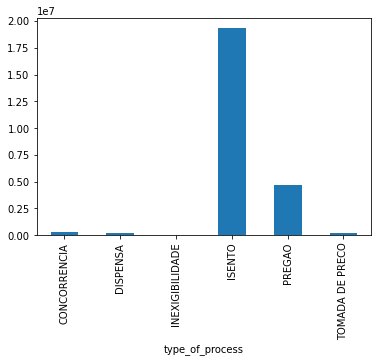

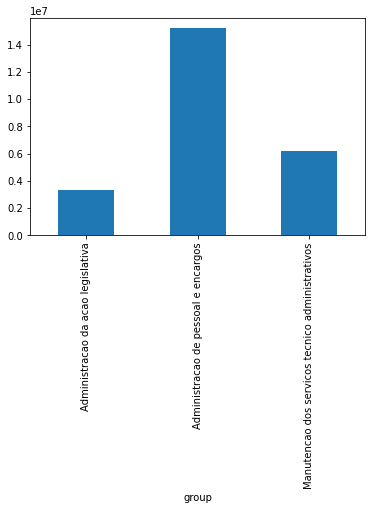

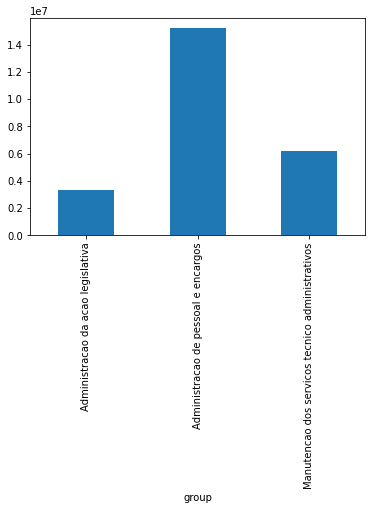

In [148]:
despesas.groupby('type_of_process')['value'].sum().plot(kind='bar')
plt.show()

despesas.groupby('group')['value'].sum().plot(kind='bar')
plt.show()

despesas.groupby('group')['value'].sum().plot(kind='bar')
plt.show()

In [123]:
despesas.group.value_counts()

Manutencao dos servicos tecnico administrativos    875
Administracao de pessoal e encargos                434
Administracao da acao legislativa                   83
Name: group, dtype: int64

In [125]:
despesas.cleaned_subgroup.value_counts()

Não encontrado                                      314
Diárias - civil                                     287
Outros serviços de terceiros - pessoa jurídica      211
Serviços bancários                                  172
Vencimentos e vantagens - pessoa civil              129
Publicidade e Propaganda                             63
Contribuição para RPPS                               62
Material de consumo - outros                         51
Serviços de Informática                              49
Serviços de Telefonia                                49
Auxílio Transporte                                   41
Contribuição para RGPS (INSS)                        39
Estagiários e Monitores                              28
Material de consumo - manutenção de veículo          27
Parcelamento IPFS                                    26
Seguros                                              23
Vale alimentação                                     20
Alimentação                                     

In [126]:
pd.set_option('display.max_rows', 1000)

despesas[despesas['cleaned_subgroup'] == 'Não encontrado']

,company_or_person,date,group,number,phase,process_number,subgroup,summary,type_of_process,value,month,suggested_group,cleaned_subgroup,value_categories
34899,EMPRESTIMO CEF,2019-12-27,NaN,01816-19,pagamento,NaN,Não encontrado,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000403,NaN,"37,753.71",12,Não encontrado,Não encontrado,"R$ 10,000.00 - 50,000.00"
34898,I.R.R.F. - FOLHA,2019-12-27,NaN,01815-19,pagamento,NaN,Não encontrado,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000402,NaN,"2,076.69",12,Não encontrado,Não encontrado,"R$ 1,000.00 - 10,000.00"
34871,MOE SERVIÇOS EIRELLI-ME,2019-12-26,NaN,01809-19,pagamento,008/2019,Não encontrado,REF. SERVIÇO DE MANUTENÇÃO PREVENTIVA E CORRET...,PREGAO,"1,190.00",12,Não encontrado,Não encontrado,"R$ 1,000.00 - 10,000.00"
34907,I.R.R.F. - PROCESSOS,2019-12-26,NaN,01805-19,pagamento,NaN,Não encontrado,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000397,NaN,"2,315.69",12,Não encontrado,Não encontrado,"R$ 1,000.00 - 10,000.00"
34906,I.N.S.S. S/ PROCESSOS,2019-12-26,NaN,01804-19,pagamento,NaN,Não encontrado,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000396,NaN,110.00,12,Não encontrado,Não encontrado,"R$ 0.00 - 1,000.00"
34904,CHESTER AUTOMAÇÃO COMERCIO E SERVIÇOS LTDA,2019-12-26,NaN,01810-19,pagamento,060/2019,Não encontrado,REF. A SERVIÇO DE MANUTENÇÃO PREVENTIVA E CORR...,DISPENSA,588.00,12,Não encontrado,Não encontrado,"R$ 0.00 - 1,000.00"
34931,I.S.S,2019-12-26,NaN,01806-19,pagamento,NaN,Não encontrado,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000398,NaN,"12,852.38",12,Não encontrado,Não encontrado,"R$ 10,000.00 - 50,000.00"
34932,I.S.S,2019-12-26,NaN,01807-19,pagamento,NaN,Não encontrado,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000399,NaN,17.42,12,Não encontrado,Não encontrado,"R$ 0.00 - 1,000.00"
34933,RETENCOES DIVERSAS,2019-12-26,NaN,01808-19,pagamento,NaN,Não encontrado,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000400,NaN,3.99,12,Não encontrado,Não encontrado,"R$ 0.00 - 1,000.00"
34934,I.S.S,2019-12-26,NaN,01812-19,pagamento,NaN,Não encontrado,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:000401,NaN,12.00,12,Não encontrado,Não encontrado,"R$ 0.00 - 1,000.00"


In [127]:
despesas.company_or_person.value_counts()

CAIXA ECONOMICA FEDERAL                                         172
IPFS - INST. DE PREV. DOS SERV                                  101
REDE GERAL SERVIÇOS LTDA ME                                      65
FUNCIONARIOS CARGOS EM COMISSA                                   55
INSS - INST. NAC. DE SEG. SOCI                                   51
JAIRO DOMINGOS SANTOS                                            46
I.S.S                                                            43
VEREADORES                                                       42
JEFFERSON SANTOS DE SANTANA                                      40
FUNCIONARIOS EFETIVOS                                            40
IPFS C.M.F.S.                                                    39
MANOEL LUIS SENA DA CRUZ                                         39
FUNCIONARIOS  A DISPOSICAO                                       33
CRISTIANO BACELAR DE JESUS                                       31
GABRIEL PESSOA DOS SANTOS                       

In [128]:
despesas.groupby(['company_or_person']).sum().groupby(level=[0])['value'].cumsum().sort_values(ascending=False)

company_or_person
FUNCIONARIOS CARGOS EM COMISSA                                         8,934,114.84
INSS - INST. NAC. DE SEG. SOCI                                         3,100,402.72
FUNCIONARIOS EFETIVOS                                                  2,520,349.98
VEREADORES                                                             2,452,739.15
ESFERA PRODUÇÃO E EVENTOS EIRELI-ME                                    1,616,129.37
GREEN CARD S/A REFEIÇÕES COMER                                         1,614,774.18
IPFS - INST. DE PREV. DOS SERV                                         1,518,840.68
I.R.R.F. - FOLHA                                                       1,313,871.60
I.N.S.S - FOLHA                                                          791,296.59
DESCONTO SICOOB- C.M.F.S.                                                528,047.32
ATIVACOOP COOPERATIVA DE TRABALHO DE ATIVIDADES GERAIS DA BA             416,333.18
EMPRESTIMO CEF                                            

## O que a Câmara consome mais em cada categoria?

In [154]:
despesas['summary'].describe()

count                                               1704
unique                                              1385
top       REF. A TARIFA BANCÁRIA SOBRE CONTA DESTA CASA.
freq                                                 138
Name: summary, dtype: object

In [157]:
despesas[['cleaned_subgroup', 'summary', 'value']].tail(20)

,cleaned_subgroup,summary,value
31431,Outros serviços de terceiros - pessoa jurídica,REF. A TARIFA DE ENERGIA ELÉTRICA DESTA CASA.,"5,975.55"
31557,Vencimentos e vantagens - pessoa civil,"REF. A VENCIMENTOS DOS SERVIDORES EFETIVOS, MÊ...","167,841.26"
31662,Auxílio Transporte,REF. A PARTE PATRONAL DO VALE TRANSPORTE DOS S...,"1,006.01"
31661,Auxílio Transporte,REF. A PARTE PATRONAL DO VALE TRANSPORTE DOS S...,"2,841.12"
31558,Vencimentos e vantagens - pessoa civil,REF. A VENCIMENTOS DOS SERVIDORES À DISPOSIÇÃO...,"12,146.52"
31560,Vencimentos e vantagens - pessoa civil,REF. A ADIANTAMENTO DO 13º SALÁRIO DOS SERVIDO...,"23,236.33"
31559,Vencimentos e vantagens - pessoa civil,REF. A ADIANTAMENTO DO 13º SALÁRIO DOS SERVIDO...,"1,806.46"
31392,Serviços bancários,REF. A TARIFA BANCÁRIA SOBRE CONTA DESTA CASA.,1.62
31389,Publicidade e Propaganda,REF. A PUBLICAÇÃO DE EXTRATO DE DECRETOS INDIV...,"4,069.80"
31387,Serviços bancários,REF. A TARIFA BANCÁRIA SOBRE CONTA DESTA CASA.,3.24
